Gradient Descent : Code for 3 Types

---



In [0]:
# Importing required Packages
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
import matplotlib.pyplot as plt
import random
import time

In [2]:
data = pd.read_csv("SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [0]:
l = data['l'].values
t = data['t'].values
tsq = t * t

Stochastic gradient descent (Single sample)

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

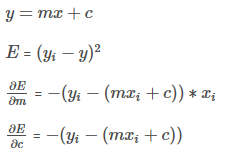

In [0]:
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e

def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

In [0]:
# Init m, c
m, c = 0, 0

# Learning rate
lr = 0.001

In [6]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

<IPython.core.display.Javascript object>

m = 2.20181 c = 1.18772 Error = 0.681691
m = 2.92071 c = 0.775209 Error = 0.345256
m = 3.37305 c = 0.515213 Error = 0.0427689
m = 3.65767 c = 0.351383 Error = 6.26296e-05
m = 3.83697 c = 0.248498 Error = 0.00036188
m = 3.94986 c = 0.183792 Error = 6.54362e-05
m = 4.02082 c = 0.142894 Error = 0.000759692
m = 4.0655 c = 0.117185 Error = 0.00624395
m = 4.09367 c = 0.101061 Error = 0.0076063
m = 4.11137 c = 0.0908642 Error = 0.0114889


Plotting Errors Vs Iterations

In [0]:
ms, cs,errs = [], [], []
m, c = 0, 0
eta = 0.001
for times in range(200):
    m, c, error = train_stochastic(l, tsq, m, c, eta, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 20000,100)


In [8]:
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Stochastic Gradient Descent")
plt.show()

<IPython.core.display.Javascript object>

Problem with Sequential Gradient Descent is it does not scale well - it makes the same calculation of gradient descent on each sample sequentially. So the time taken will increase linearly with the number of samples. Many datasets have samples in the range of millions. Hence, even though it gives good results, it is not ideal.

We need a gradient descent formulation that gives the speed of vanilla gradient descent and the accuracy of sequential/stochastic gradient descent.

Batch Gradient Descent

In [0]:
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_on_all(x, y, m, c, eta, iterations=1000):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

In [10]:
# Init m, c
m, c = 0, 0

# Learning rate
lr = 0.01

# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_on_all(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

<IPython.core.display.Javascript object>

m = 1.28677 c = 1.54235 Error = 0.567336
m = 1.62739 c = 1.50603 Error = 0.438432
m = 1.87741 c = 1.37352 Error = 0.358112
m = 2.099 c = 1.24699 Error = 0.292845
m = 2.29864 c = 1.13234 Error = 0.239713
m = 2.47876 c = 1.02887 Error = 0.196459
m = 2.64127 c = 0.9355 Error = 0.161247
m = 2.78789 c = 0.851259 Error = 0.132582
m = 2.92019 c = 0.775251 Error = 0.109246
m = 3.03955 c = 0.706672 Error = 0.0902493


In [11]:
print("From our Gradient Descent   m = {0:.06} c = {1:.06}".format(m, c))

msp, csp, _, _, _ = stat.linregress(l,tsq)
print("From scipy.stats.linregress m = {0:.06} c = {1:.06}".format(msp, csp))

From our Gradient Descent   m = 3.03955 c = 0.706672
From scipy.stats.linregress m = 4.14148 c = 0.0735804


Plotting error vs Iterations

So far we have seen how the Gradient Descent works by looking at the fit of the regression line. Let us change perspectives and plot the error at various stages. This just shows that the process is converging and gives us a feel for the rate at which it is converging.
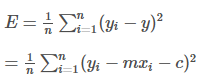

In [12]:
import matplotlib.pyplot as plt

ms, cs,errs = [], [], []
m, c = 0, 0
eta = 0.001
for times in range(200):
    m, c, error = train_on_all(l, tsq, m, c, eta, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 20000,100)
plt.figure(figsize=(8,5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Vanilla Gradient Descent - Batch")
plt.show()

<IPython.core.display.Javascript object>

Mini Batch Gradient

In Mini-Batch Gradient Descent algorithm, rather than using the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function.

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

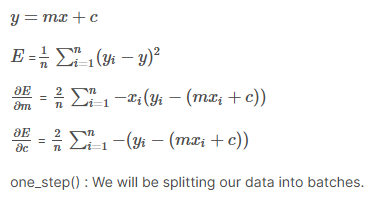

In [0]:
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err

In [0]:
# Init m, c
m, c = 0, 0

# Learning rate
lr = 0.001

# Batch size
batch_size = 10

In [15]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

<IPython.core.display.Javascript object>

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


Plotting Error Vs Iterations

In [16]:
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

<IPython.core.display.Javascript object>

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# creating data 
mean = np.array([5.0, 6.0]) 
cov = np.array([[1.0, 0.95], [0.95, 1.2]]) 
data = np.random.multivariate_normal(mean, cov, 8000) 
  
# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 
  
# train-test-split 
data = np.hstack((np.ones((data.shape[0], 1)), data)) 
  
split_factor = 0.90
split = int(split_factor * data.shape[0]) 
  
X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

Step #2: Next, we write the code for implementing linear regression using mini-batch gradient descent.
gradientDescent() is the main driver function and other functions are helper functions used for making predictions – hypothesis(), computing gradients – gradient(), computing error – cost() and creating mini-batches – create_mini_batches(). The driver function initializes the parameters, computes the best set of parameters for the model and returns these parameters along with a list containing history of errors as the parameters get updated.

In [0]:

# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
  
    return theta, error_list 


In [19]:
#Calling the gradientDescent() function to compute the model parameters (theta) and visualizing the change in error function.

theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 


Bias =  [0.76855015]
Coefficients =  [[1.03549799]]


Step #3 : Finally, we make predictions on the testing set and compute the mean absolute error in predictions.

In [20]:

# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 


Mean absolute error =  0.45649669340090154
